In [1]:
import os 
from general_plot import *

model_name = model_name_list[0] 


u_bes: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
u_random: [    1     5    11    25    57   127   281   609  1315  2837  6117 13179
 28389]


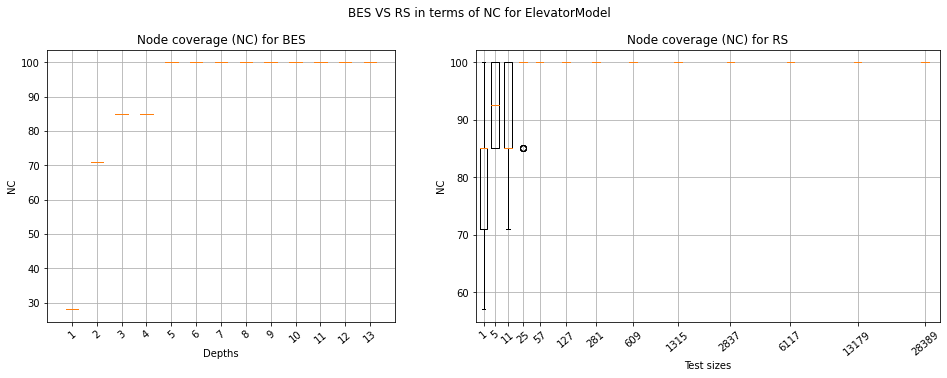

In [2]:

# repeat multi_times for each model and for each loopOpt
# init
loopOpt = False

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
data_map = {
    'need_positions' : True,
#     'positions' : [1, 2.5, 4.25, 6.25, 6, 8, 10.1, 14, 17, 20.2, 24, 30, 38],
    'positions' : [1, 2.5, 4.25, 6.25, 8.5, 12, 16, 21, 27, 34, 42, 51, 60],
    'need_xtick' : True,
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'bes_title': 'Node coverage (NC) for BES',
    'rand_title': 'Node coverage (NC) for RS',
    
    'x_bes_label': 'Depths',
    'x_rand_label': 'Test sizes',
    
    'y_bes_label': 'NC',
    'y_rand_label': 'NC',
    
    'box_width_bes' : .6,
    'box_width_rand' : 1,
    
    'x_bes_lim': 14,
    'x_rand_lim' : 62,
    
    'width_bes_ratio': 1.5,
    'width_rand_ratio': 2,
    
    'distance_to_figures': 1,
    'fig_width': 16

}



compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

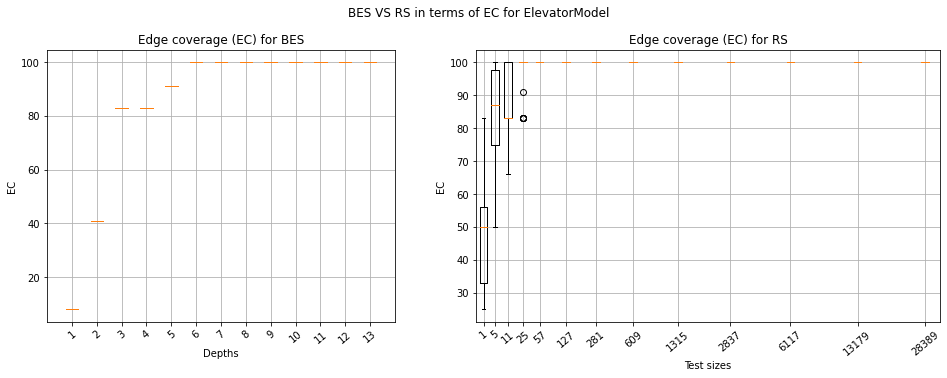

In [3]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



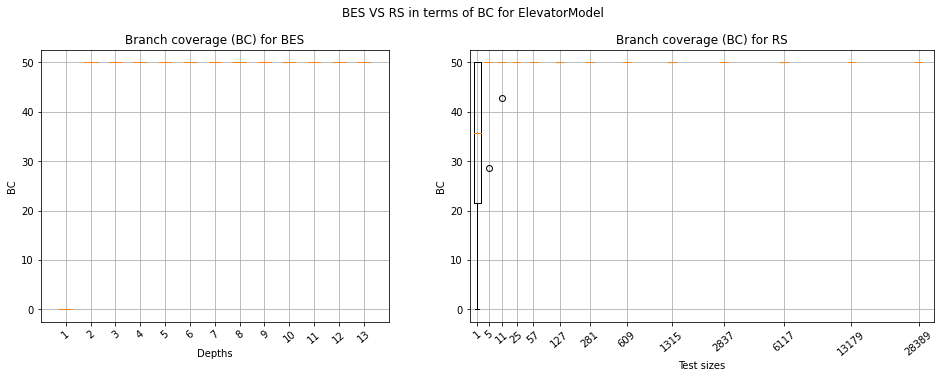

In [4]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

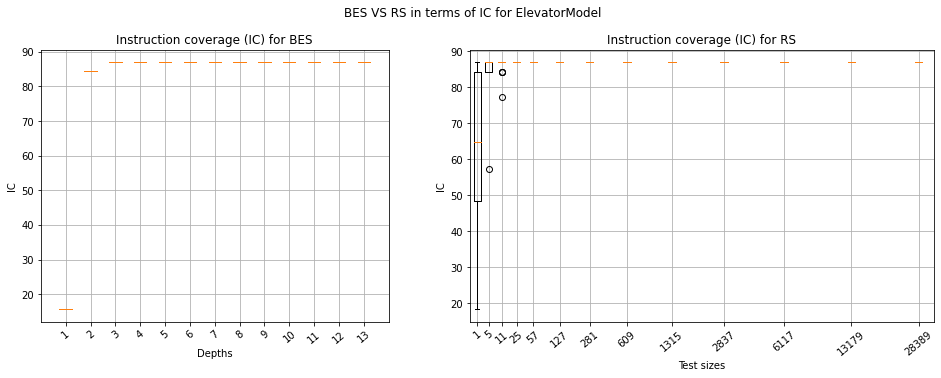

In [5]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

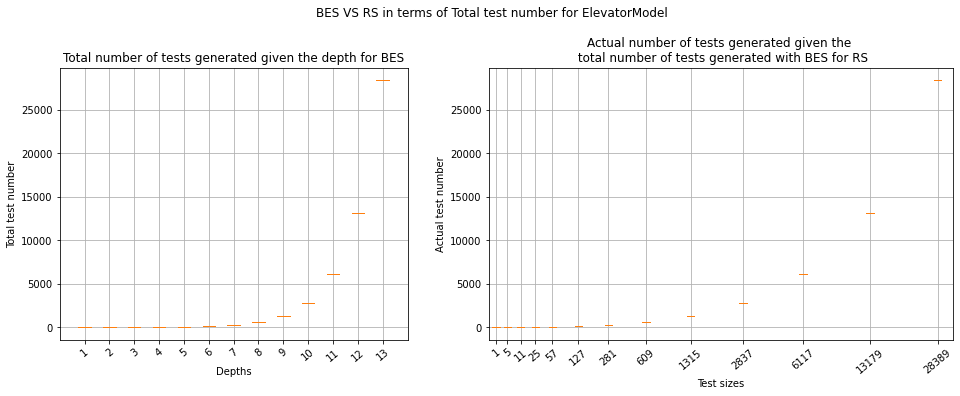

In [6]:
# total_test
creteria = 'total_tests'
data_map['bes_title'] = f'Total number of tests generated given the depth for BES'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)

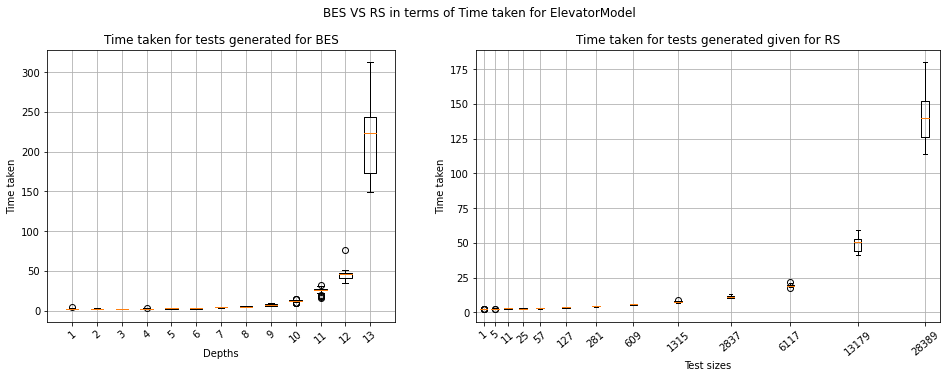

In [7]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']: 1


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



trie_total   : [1, 5, 11, 27, 67, 159, 375, 887, 2095, 4943, 11663, 27519, 64927]
actual before: [1, 5, 11, 25, 57, 127, 281, 609, 1315, 2837, 6117, 13179, 28389]
actual after : [1, 5, 11, 25, 57, 127, 281, 609, 1315, 2837, 6117, 13179, 28389]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 1 & 1  \\ \hline
2 & 5 & 5  \\ \hline
3 & 11 & 11  \\ \hline
4 & 27 & 25  \\ \hline
5 & 67 & 57  \\ \hline
6 & 159 & 127  \\ \hline
7 & 375 & 281  \\ \hline
8 & 887 & 609  \\ \hline
9 & 2095 & 1315  \\ \hline
10 & 4943 & 2837  \\ \hline
11 & 11663 & 6117  \\ \hline
12 & 27519 & 13179  \\ \hline
13 & 64927 & 28389  \\ \hline
\end{tabular}
\end{table}
**********************


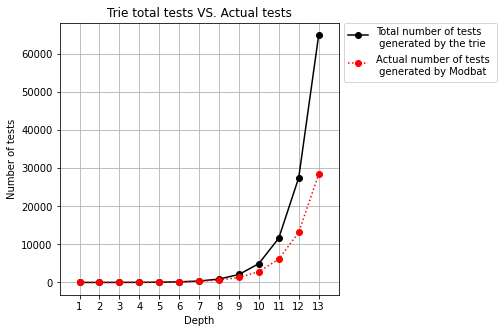

In [8]:

y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
# y2[7] = 2858
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)

u_bes: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
u_random: [    1     5    11    24    51   110   230   478   997  2080  4332  9016
 18771 39085]


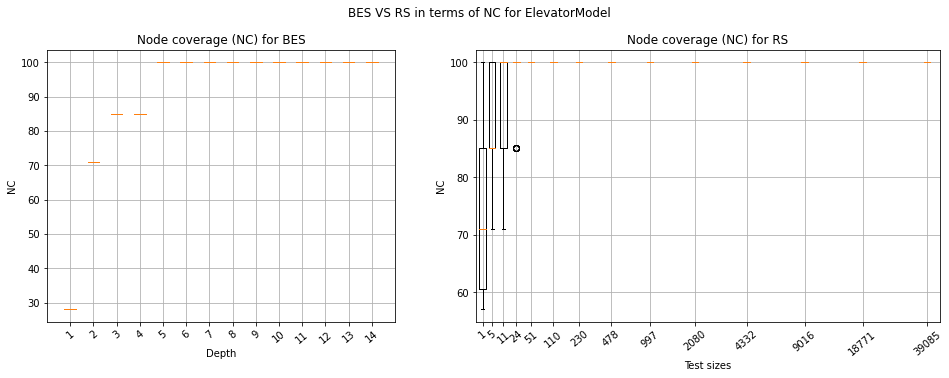

In [9]:
loopOpt = True

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
data_map['loopOpt'] = bool_to_str(loopOpt)
# data_map['positions'] = [1, 2, 3.25, 4.5, 6, 8, 10.1, 14, 17, 20.2, 24, 30, 38, 48]
data_map['positions'] = [1, 2.5, 4.25, 6.25, 8.5, 12, 16, 21, 27, 34, 42, 51, 60, 70]

data_map['box_width_bes'] = .6
data_map['box_width_rand'] = 1

data_map['x_rand_lim'] = 72
data_map['x_bes_lim'] = 15

coverage = 'NC'

data_map['bes_title'] = f'Node coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage

data_map['rand_title'] = f'Node coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

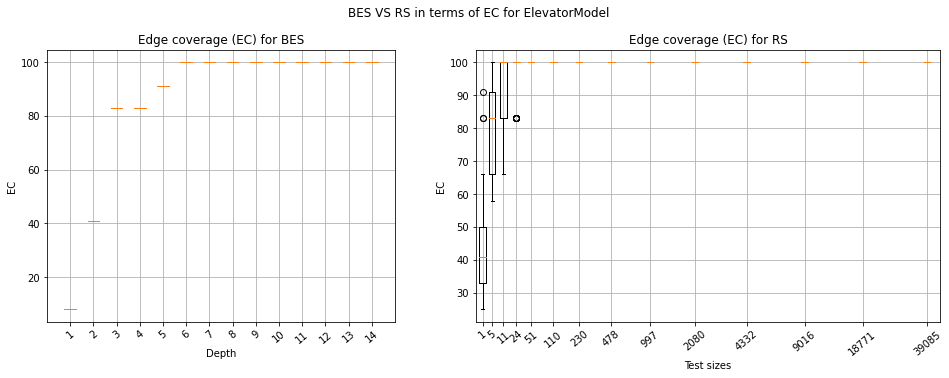

In [10]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



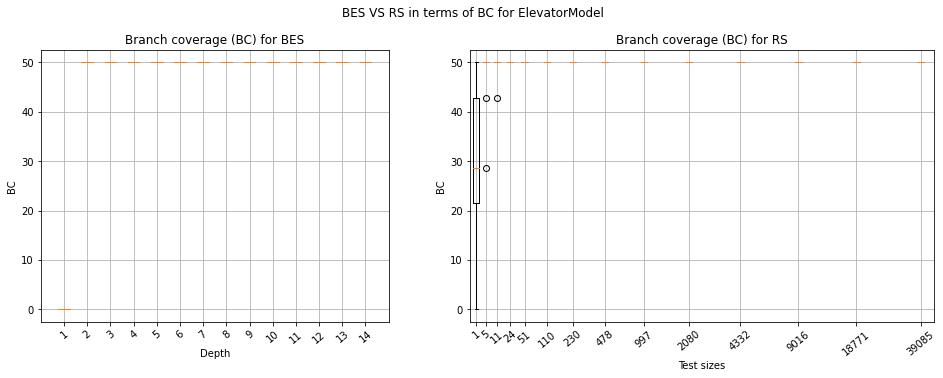

In [11]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

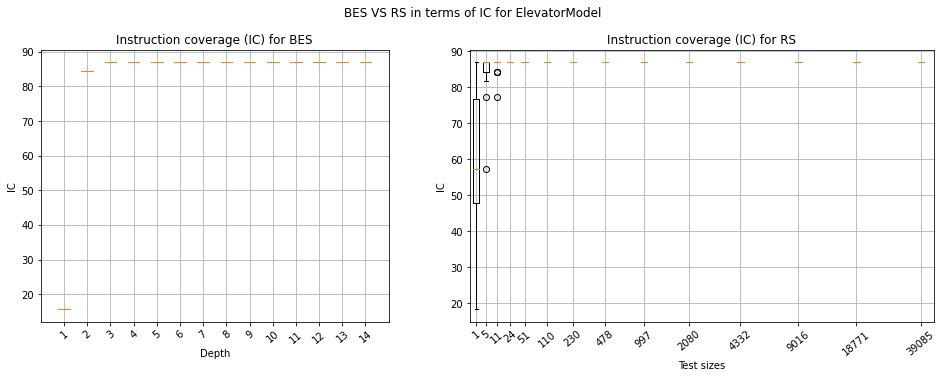

In [12]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

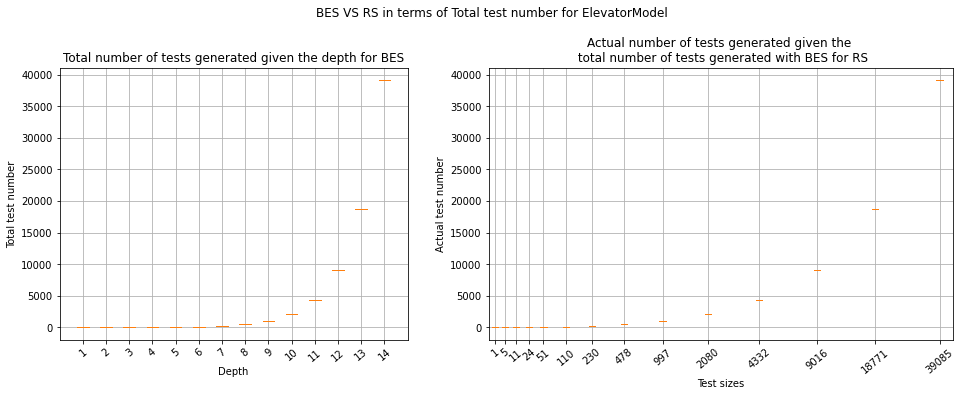

In [13]:
# total_test
creteria = 'total_tests'
data_map['bes_title'] = f'Total number of tests generated given the depth for BES'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)

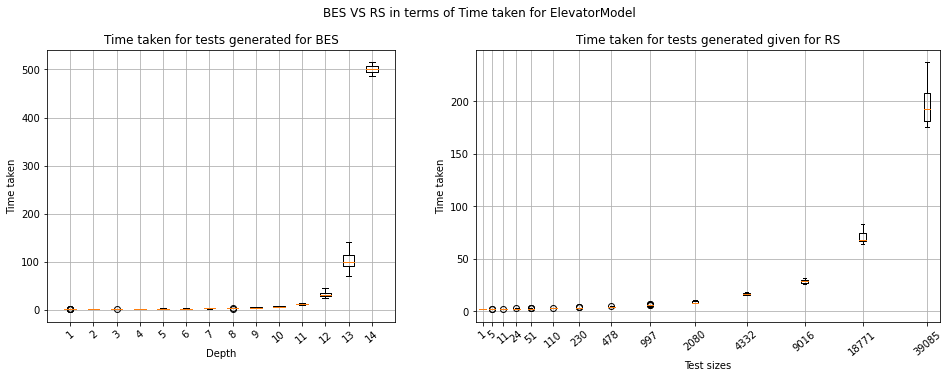

In [14]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']: 1


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



trie_total   : [1, 5, 11, 26, 61, 141, 317, 712, 1611, 3637, 8193, 18458, 41611, 93801]
actual before: [1, 5, 11, 24, 51, 110, 230, 478, 997, 2080, 4332, 9016, 18771, 39085]
actual after : [1, 5, 11, 24, 51, 110, 230, 478, 997, 2080, 4332, 9016, 18771, 39085]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 1 & 1  \\ \hline
2 & 5 & 5  \\ \hline
3 & 11 & 11  \\ \hline
4 & 26 & 24  \\ \hline
5 & 61 & 51  \\ \hline
6 & 141 & 110  \\ \hline
7 & 317 & 230  \\ \hline
8 & 712 & 478  \\ \hline
9 & 1611 & 997  \\ \hline
10 & 3637 & 2080  \\ \hline
11 & 8193 & 4332  \\ \hline
12 & 18458 & 9016  \\ \hline
13 & 41611 & 18771  \\ \hline
14 & 93801 & 39085  \\ \hline
\end{tabular}
\end{table}
**********************


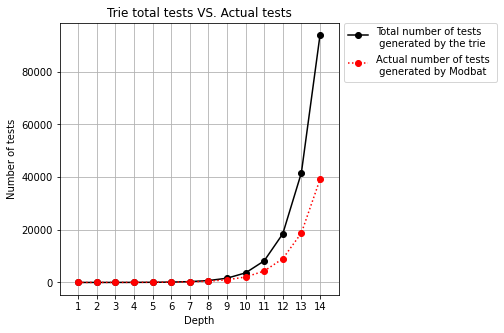

In [15]:

y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
# y2[7] = 2858
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)

In [16]:
# have a list of uniques depthes
# then for each depth a box plot of coverage of it and the corresponding depth



#make sure that the random didn't get a timeout before a depth





